## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [25]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# Basic bar graphs for each question related to gender roles

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# just plotting this would include responses that are never given, which crowds the graph
df['fechld'].value_counts()

agree                            6805
strongly agree                   4850
disagree                         3061
strongly disagree                 680
not imputable_(2147483638)          0
not available in this year          0
not available in this release       0
uncodeable                          0
skipped on web                      0
refused                             0
no answer                           0
not imputable_(2147483637)          0
dk, na, iap                         0
I don't have a job                  0
iap                                 0
don't know                          0
see codebook                        0
Name: fechld, dtype: int64

<Axes: >

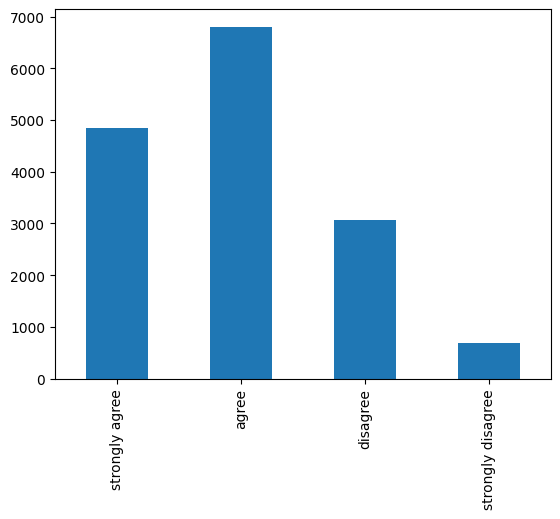

In [84]:
#FECHLD
fechld = df['fechld'].value_counts()[['strongly agree','agree', 'disagree','strongly disagree']] # value counts returns type series
fechld[fechld != 0].plot(kind='bar') # removes counts equal to 0

(array([1559.,  201.,  146.,   87.,  105.,   18.,   44.,   43.,   32.,
          33.,    6.,  133.]),
 array([ 0.        ,  8.08333333, 16.16666667, 24.25      , 32.33333333,
        40.41666667, 48.5       , 56.58333333, 64.66666667, 72.75      ,
        80.83333333, 88.91666667, 97.        ]),
 <BarContainer object of 12 artists>)

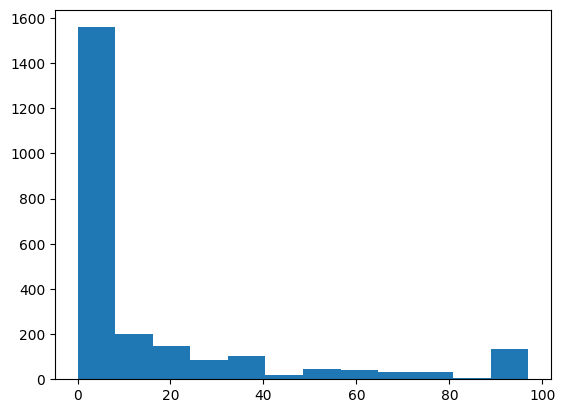

In [88]:
#RFAMLOOK
plt.hist(df['rfamlook'], bins =12)

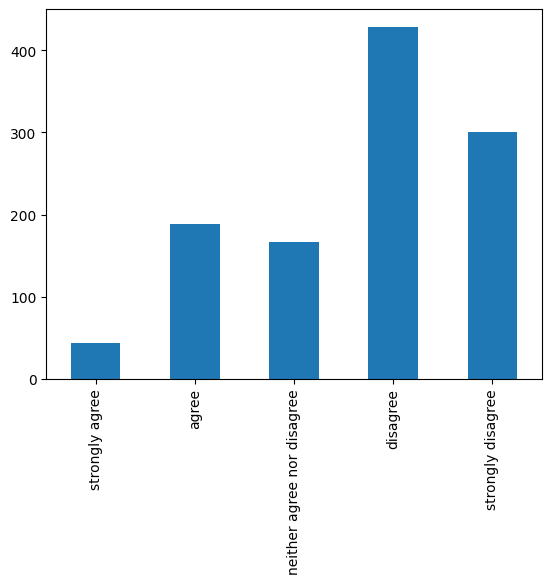

In [83]:
#FEPRESCH2
fepresch2 = df['fepresch2'].value_counts()[['strongly agree','agree', 'neither agree nor disagree','disagree','strongly disagree']].plot(kind='bar')

<Axes: >

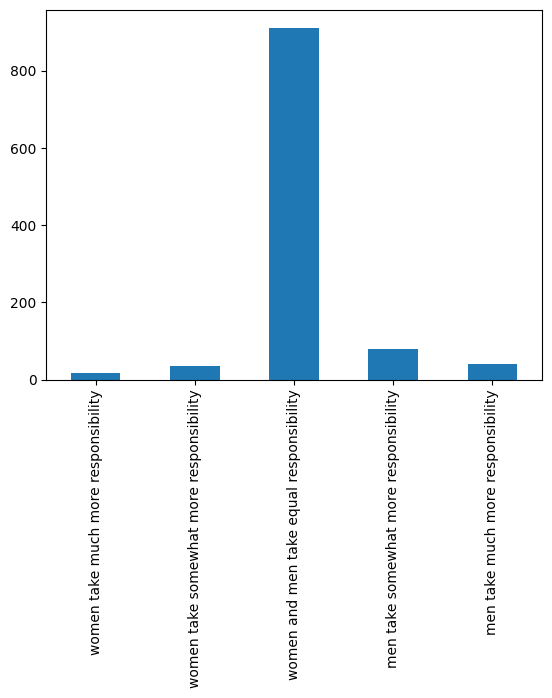

In [90]:
#RSPGNDR
rspgndr = df['rspgndr'].value_counts()[['women take much more responsibility', 'women take somewhat more responsibility', 'women and men take equal responsibility', 'men take somewhat more responsibility', 'men take much more responsibility']] # value counts returns type series
rspgndr[rspgndr != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

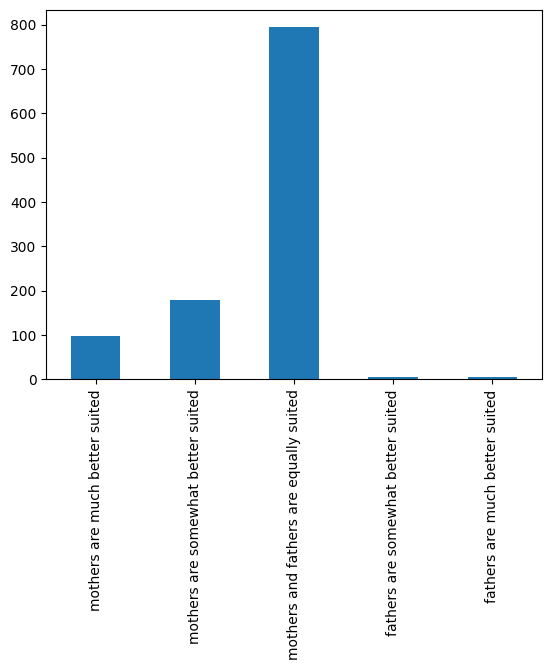

In [97]:
#PRNTLK
prntlk = df['prntlk'].value_counts()[['mothers are much better suited','mothers are somewhat better suited','mothers and fathers are equally suited','fathers are somewhat better suited','fathers are much better suited']] # value counts returns type series
prntlk[prntlk != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

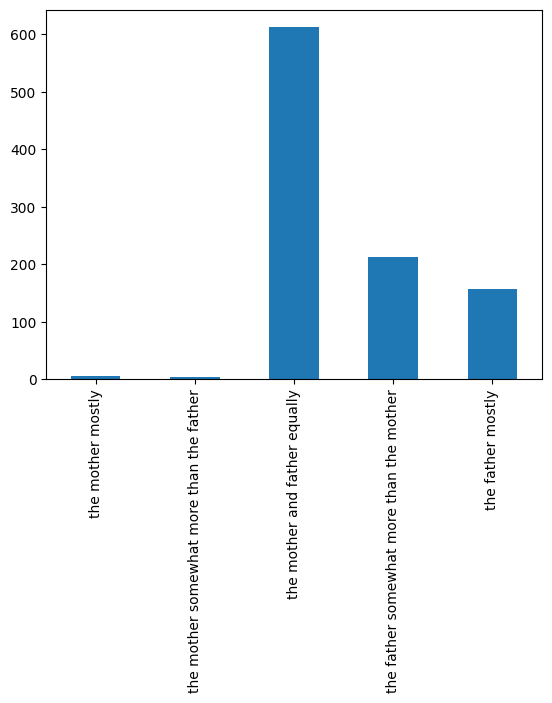

In [101]:
#PRNTFNCE
prntfnce = df['prntfnce'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntfnce[prntfnce != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

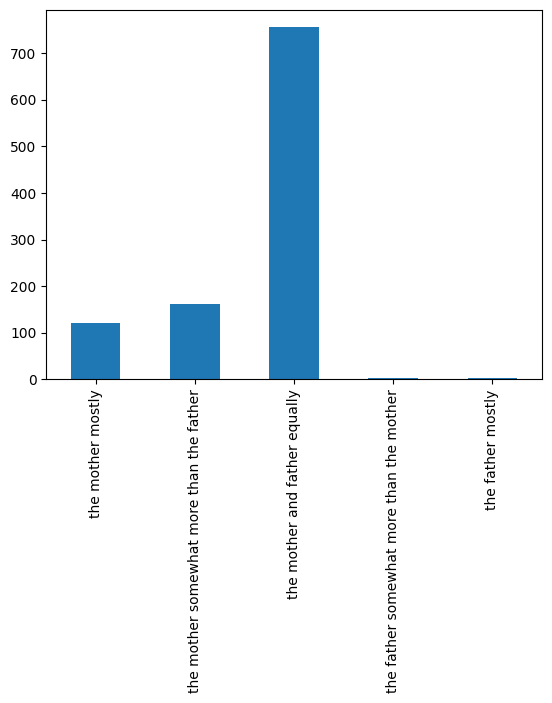

In [103]:
#PRNTCRE
prntcre = df['prntcre'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntcre[prntcre != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

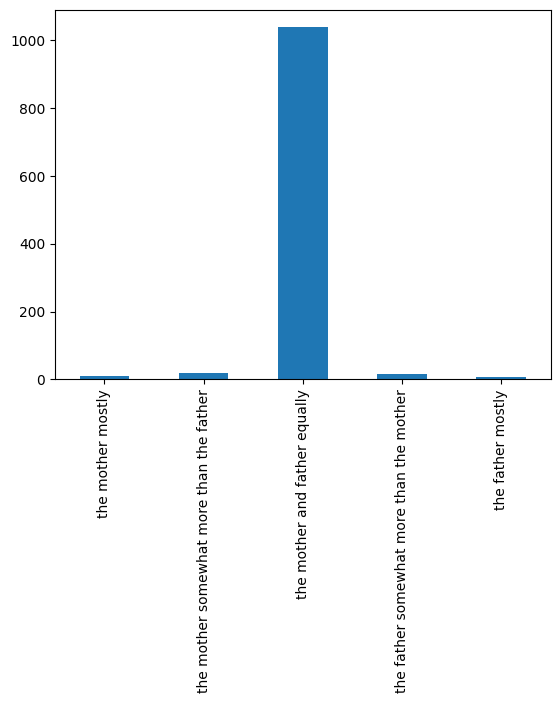

In [104]:
#PRNTPLY
prntply = df['prntply'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntply[prntply != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

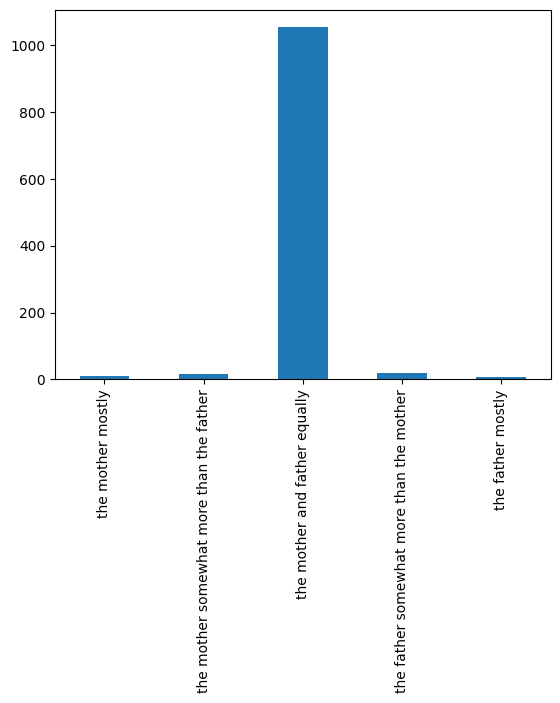

In [105]:
#PRNTBHAV
prntbhav = df['prntbhav'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntbhav[prntbhav != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

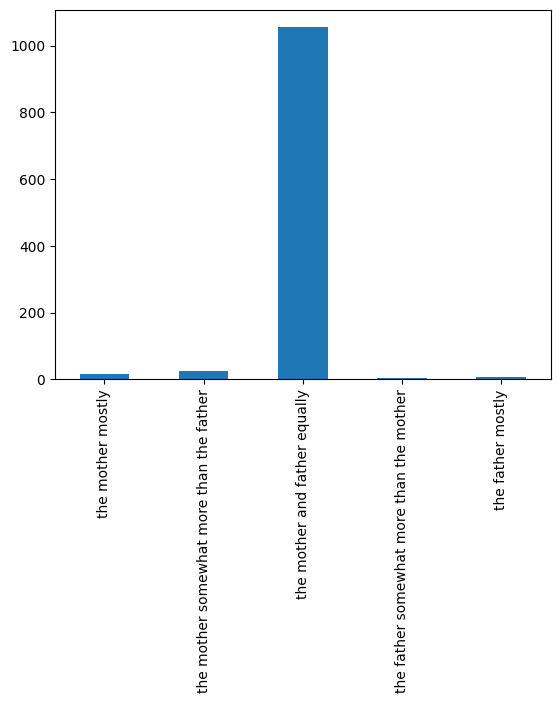

In [106]:
#PRNTADVS
prntadvs = df['prntadvs'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntadvs[prntadvs != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

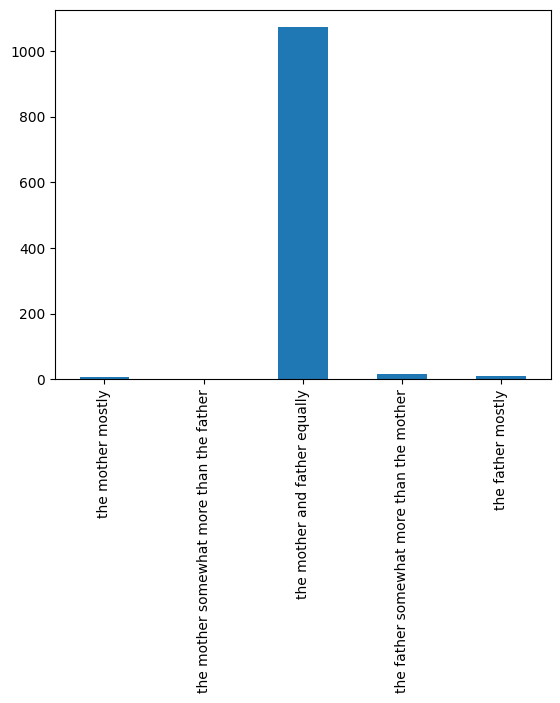

In [107]:
#PRNTMDL
prntmdl = df['prntmdl'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntmdl[prntmdl != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

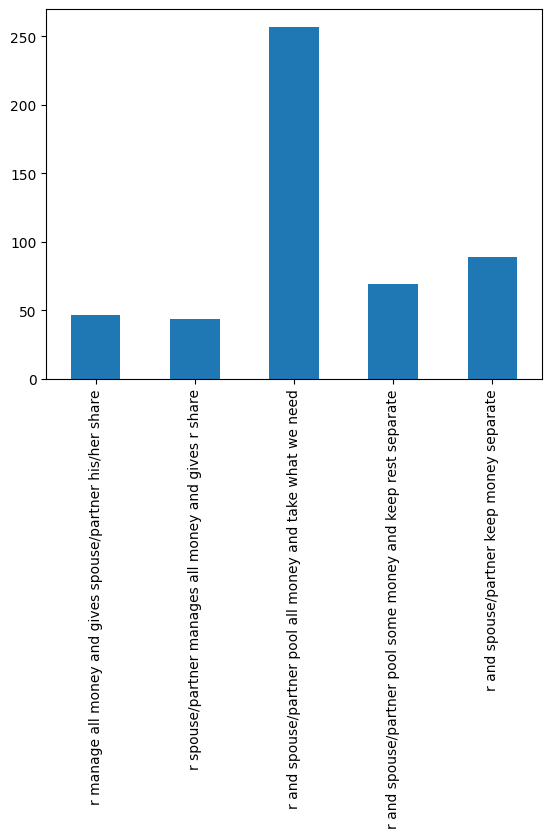

In [112]:
#ORGINC
orginc = df['orginc'].value_counts()[['r manage all money and gives spouse/partner his/her share',
                                      'r spouse/partner manages all money and gives r share',
                                      'r and spouse/partner pool all money and take what we need',
                                      'r and spouse/partner pool some money and keep rest separate',
                                      'r and spouse/partner keep money separate']] # value counts returns type series
orginc[orginc != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

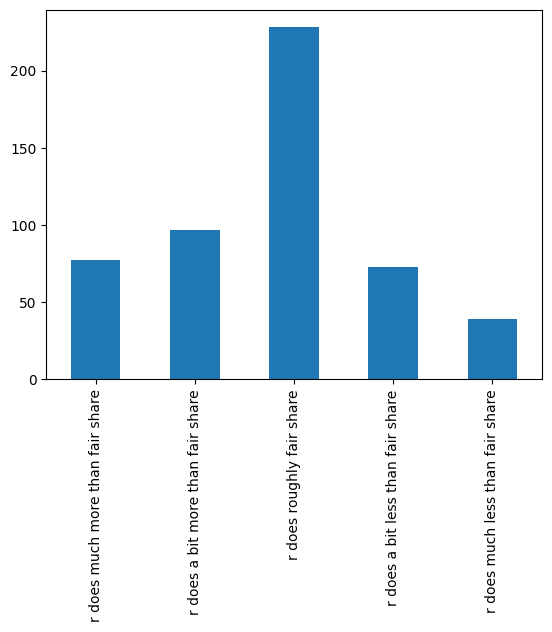

In [116]:
#SHAREHHW
sharehhw = df['sharehhw'].value_counts()[['r does much more than fair share',
                                      'r does a bit more than fair share',
                                      'r does roughly fair share',
                                      'r does a bit less than fair share',
                                      'r does much less than fair share']] # value counts returns type series
sharehhw[sharehhw != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

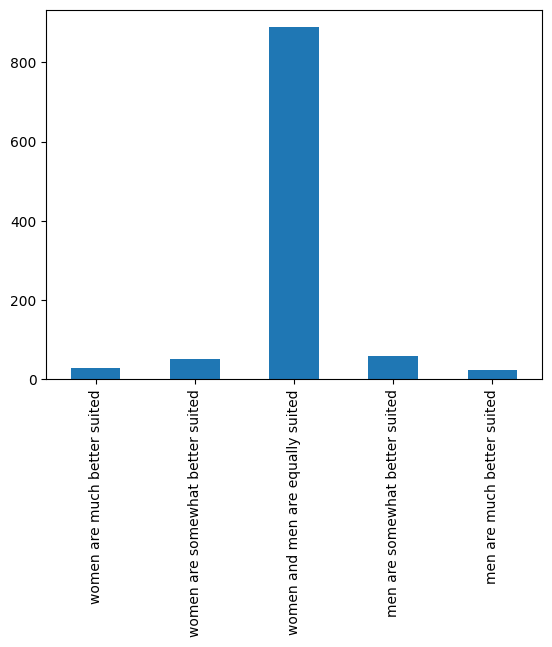

In [118]:
#CABGNDR
cabgndr = df['cabgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
cabgndr[cabgndr != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

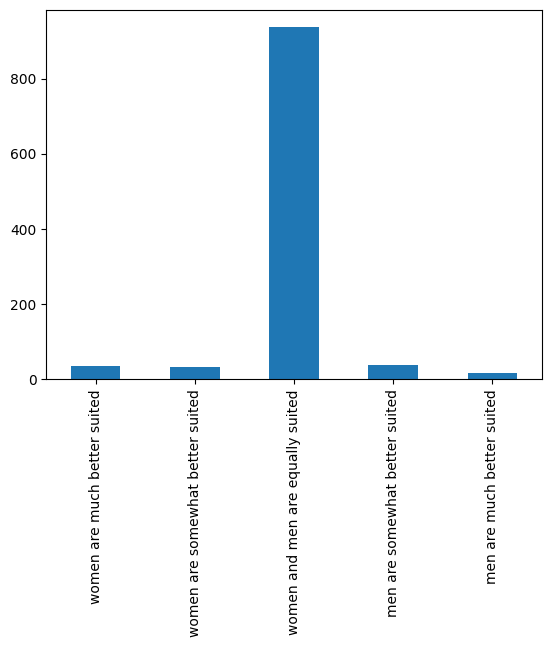

In [119]:
#UNIVGNDR
univgndr = df['univgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
univgndr[univgndr != 0].plot(kind='bar') # removes counts equal to 0

<Axes: >

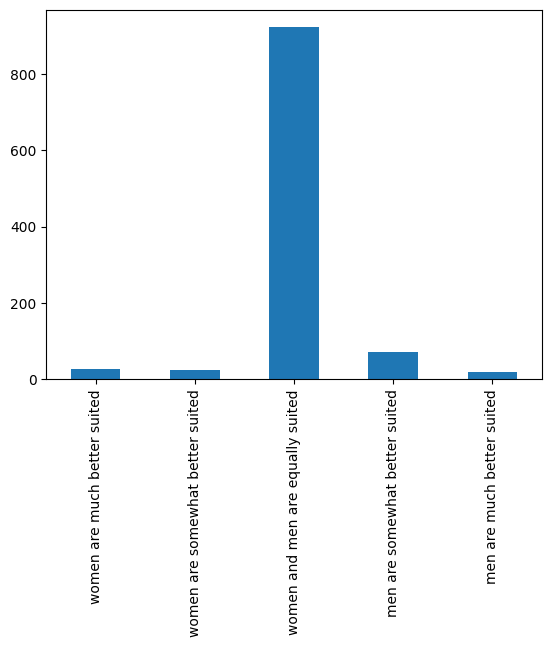

In [120]:
#EXECGNDR
execgndr = df['execgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
execgndr[execgndr != 0].plot(kind='bar') # removes counts equal to 0